## Лабораторная работа №2
#### Дорохин Андрей 221-361


[1] Модель с K=5
Точность (Accuracy): 70.78%

Матрица ошибок:
[[81 19]
 [26 28]]

Поиск оптимального K:
K =  1  Точность: 68.74%
K =  2  Точность: 69.55%
K =  3  Точность: 73.30%
K =  4  Точность: 72.48%
K =  5  Точность: 75.09%
K =  6  Точность: 73.62%
K =  7  Точность: 74.76%
K =  8  Точность: 75.41%
K =  9  Точность: 76.88%
K = 10  Точность: 76.22%
K = 11  Точность: 76.87%
K = 12  Точность: 76.39%
K = 13  Точность: 77.36%
K = 14  Точность: 76.39%
K = 15  Точность: 77.04%
K = 16  Точность: 77.04%
K = 17  Точность: 78.02%
K = 18  Точность: 76.87%
K = 19  Точность: 77.86%
K = 20  Точность: 77.53%
K = 21  Точность: 77.37%
K = 22  Точность: 76.88%
K = 23  Точность: 77.04%
K = 24  Точность: 76.39%
K = 25  Точность: 77.20%
K = 26  Точность: 76.55%
K = 27  Точность: 76.55%
K = 28  Точность: 77.04%
K = 29  Точность: 76.88%
K = 30  Точность: 76.22%
K = 31  Точность: 76.71%
K = 32  Точность: 76.88%
K = 33  Точность: 76.88%
K = 34  Точность: 76.06%
K = 35  Точность: 76.23%
K = 36  Точность: 75.

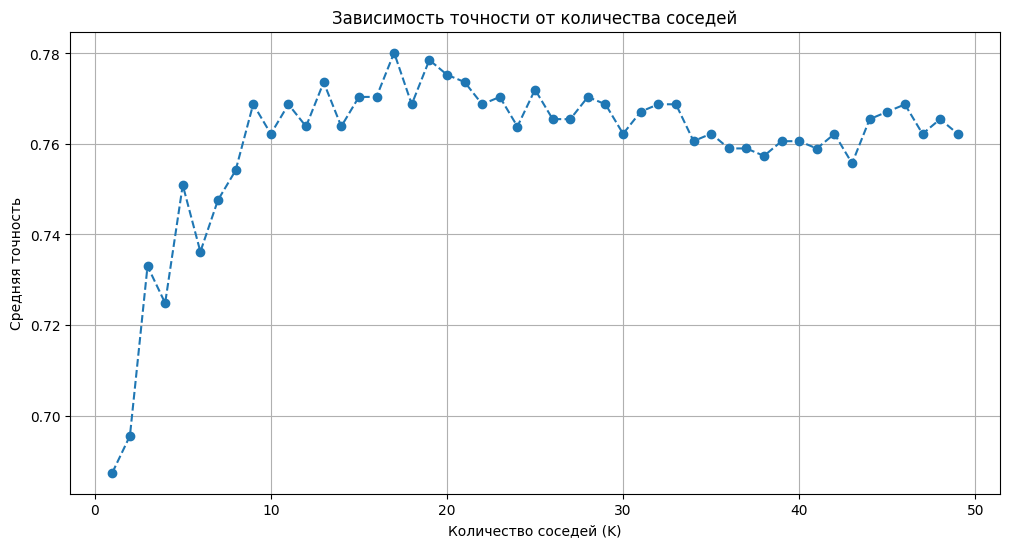


Оптимальное значение K: 17

Модель с оптимальным K=17
Точность (Accuracy): 74.68%
Матрица ошибок:
[[84 16]
 [23 31]]


In [6]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Этап 0: Загрузка и предобработка данных

# Загрузка данных
df = pd.read_csv("diabetes.csv")

# Разделение на признаки и целевую переменную
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Разделение на тренировочную и тестовую выборки ПЕРЕД обработкой
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Замена нулевых значений на медиану ТРЕНИРОВОЧНЫХ данных
columns_to_fix = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for column in columns_to_fix:
    # Вычисляем медиану по тренировочной выборке
    train_median = X_train[column].median()
    # Заменяем нули в тренировочных данных
    X_train[column] = X_train[column].replace(0, train_median)
    # Заменяем нули в тестовых данных на медиану из тренировочных
    X_test[column] = X_test[column].replace(0, train_median)

# Этап 1: Нормировка данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Этап 2: Обучение модели и предсказание
kn = 5
knn = KNeighborsClassifier(n_neighbors=kn)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Этап 3: Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(f"[1] Модель с K={kn}")
print(f"Точность (Accuracy): {accuracy * 100:.2f}%")

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nМатрица ошибок:")
print(conf_matrix)

# Подбор оптимального K с кросс-валидацией
k_values = list(range(1, 50))  # Уменьшим диапазон для скорости
mean_accuracies = []

print("\nПоиск оптимального K:")
for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn_temp,
        X_train_scaled,
        y_train,
        cv=5,
        scoring="accuracy"
    )
    mean_accuracy = scores.mean()
    mean_accuracies.append(mean_accuracy)
    
    print(f"K = {k:2d}  Точность: {mean_accuracy * 100:.2f}%")

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(k_values, mean_accuracies, marker='o', linestyle='--')
plt.title("Зависимость точности от количества соседей")
plt.xlabel("Количество соседей (K)")
plt.ylabel("Средняя точность")
plt.grid(True)
plt.show()

# Выбор оптимального K
optimal_k = k_values[np.argmax(mean_accuracies)]
print(f"\nОптимальное значение K: {optimal_k}")

# Проверка модели с оптимальным K
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train_scaled, y_train)
y_pred_final = final_knn.predict(X_test_scaled)

# Оценка финальной модели
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"\nМодель с оптимальным K={optimal_k}")
print(f"Точность (Accuracy): {final_accuracy * 100:.2f}%")
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred_final))